In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
data_set = pd.read_csv("dataset/qualifier.csv")
data_set.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Administrator
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Project Manager
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Project Manager
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Intelligence Analyst


##  

####    Basic Data Pre-processing Begins Here
-   Checking Null
-   Dropping off non-relevant

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [6]:
data_set.isna().sum()

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

In [7]:
be_used_ds = data_set.drop(["Percentage in Electronics Subjects", "Percentage in Computer Architecture", "Hours working per day", "Logical quotient rating", "coding skills rating", "public speaking points", "can work long time before system?", "Extra-courses did", "workshops", "talenttests taken?", "olympiads", "reading and writing skills", "memory capability score", "Interested subjects", "Job/Higher Studies?",  "Taken inputs from seniors or elders", "interested in games", "Interested Type of Books", "Salary Range Expected", "In a Realtionship?", "Gentle or Tuff behaviour?", "Salary/work", "hard/smart worker"], axis=1)
be_used_ds

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Mathematics,Percentage in Communication skills,hackathons,self-learning capability?,certifications,interested career area,Type of company want to settle in?,Management or Technical,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,84,61,0,yes,shell programming,system developer,Web Services,Management,yes,no,Database Administrator
1,78,62,73,60,71,84,91,1,no,machine learning,Business process analyst,SAaS services,Technical,no,yes,Project Manager
2,71,86,91,87,61,72,94,4,no,app development,developer,Sales and Marketing,Management,no,yes,Project Manager
3,76,87,60,84,89,88,69,1,yes,python,testing,Testing and Maintainance Services,Management,yes,yes,Security Administrator
4,92,62,90,67,71,71,73,4,no,app development,testing,product development,Management,yes,yes,Business Intelligence Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,84,69,6,no,app development,system developer,Testing and Maintainance Services,Management,yes,no,Software Developer
19996,80,69,83,87,82,92,67,0,no,full stack,Business process analyst,Product based,Management,no,yes,Business Intelligence Analyst
19997,83,70,80,87,64,94,88,6,yes,information security,cloud computing,SAaS services,Technical,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,87,61,4,no,full stack,testing,Cloud Services,Management,yes,no,Project Manager


####    Advance Processing and Basic Modelling Begins Here

In [8]:
# train_set = be_used_ds.sample(frac=0.80)
# test_set = be_used_ds.drop(train_set.index)
# print(train_set.shape, test_set.shape)

In [9]:
train, test, train_y, test_y = train_test_split(be_used_ds.iloc[:,:-1], be_used_ds.iloc[:,-1], test_size=0.25, 
                                                random_state=45)

print(f"train_shape = {train.shape}, test_shape = {test.shape}, train_y_shape = {train_y.shape} test_y_shape = {test_y.shape}")

train_shape = (15000, 15), test_shape = (5000, 15), train_y_shape = (15000,) test_y_shape = (5000,)


In [10]:
def concat(base, dummied):
    dummied.index = base.index
    data = pd.concat([base, dummied], axis=1)
    return data

In [11]:
cat_df = be_used_ds.select_dtypes(include=['object'])
cat_feats = cat_df.columns.drop('Suggested Job Role')

In [12]:
num_df = be_used_ds.select_dtypes(exclude=['object'])
num_feats = num_df.columns

['Project Manager' 'Project Manager' 'Software Developer' ...
 'Project Manager' 'Software Developer' 'Software Developer']


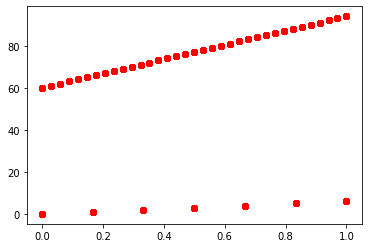

In [13]:
X = train[num_feats]
y = train_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

log_model = LogisticRegression()
log_model.fit(X_train_s, y_train)
print(log_model.predict(X_test_s))

# train on only numberical features

log_model.fit(X_train_s, y_train)
y_preds = log_model.predict(X_test_s)

plt.plot(X_train_s, X_train, 'ro')

In [18]:
# Buiding model base on all features

# Seperate Train and Valiadtion set
X = train.copy()
y = train_y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

X_train_cat = X_train[cat_feats]
X_train_num = X_train[num_feats]

X_test_cat = X_test[cat_feats]
X_test_num = X_test[num_feats]

onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(X_train_cat)
X_train_hot = pd.DataFrame(onehot.transform(X_train_cat), columns= onehot.get_feature_names())
X_test_hot = pd.DataFrame(onehot.transform(X_test_cat), columns= onehot.get_feature_names())

X_train_all = concat(X_train_num, X_train_hot)
X_test_all = concat(X_test_num, X_test_hot)

scaler = MinMaxScaler()
scaler.fit(X_train_all)       # Nomarlization
x_norms = scaler.transform(X_train_all)
x_norms_flat = x_norms.reshape(x_norms.shape[0], -1)

# y_train_hot = y_train.values.reshape(y_train.shape[0], -1)

onehot.fit(y_train)
y_train_hot = pd.DataFrame(onehot.transform(y_train), columns= onehot.get_feature_names())
y_train_hot


ValueError: Expected 2D array, got 1D array instead:
array=['Database Administrator' 'Software Developer' 'Project Manager' ...
 'Business Intelligence Analyst' 'Project Manager' 'Software Developer'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
### Model Architecture 
dnn_model = tf.keras.Sequential(name='Deep_NN_Model')
input_shape = (x_norms_flat.shape[1],)
hidden_layer1 = tf.keras.layers.Dense(units=512, activation='relu', input_shape=input_shape)
hidden_layer2 = tf.keras.layers.Dense(units=128, activation='relu', input_shape=input_shape)
hidden_layer3 = tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape)
hidden_layer4 = tf.keras.layers.Dense(units=32, activation='relu', input_shape=input_shape)
hidden_layer5 = tf.keras.layers.Dense(units=16, activation='relu', input_shape=input_shape)
hidden_layer6 = tf.keras.layers.Dense(units=8, activation='relu', input_shape=input_shape)
hidden_layer7 = tf.keras.layers.Dense(units=4, activation='relu', input_shape=input_shape)
hidden_layer8 = tf.keras.layers.Dense(units=2, activation='relu', input_shape=input_shape)
hidden_layer9 = tf.keras.layers.Dense(units=512, activation='relu', input_shape=input_shape)
hidden_layer10 = tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape)
layer_ouput = tf.keras.layers.Dense(units=y_train_hot.shape[1], activation='softmax')
dnn_model.add(hidden_layer1)
dnn_model.add(hidden_layer2)
dnn_model.add(hidden_layer3)
dnn_model.add(hidden_layer4)
dnn_model.add(hidden_layer5)
dnn_model.add(hidden_layer6)
dnn_model.add(hidden_layer7)
dnn_model.add(hidden_layer8)
dnn_model.add(hidden_layer9)
dnn_model.add(hidden_layer10)
dnn_model.add(layer_ouput)
dnn_model.summary()

Model: "Deep_NN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 524)               18340     
                                                                 
 dense_1 (Dense)             (None, 64)                33600     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)               

In [17]:
### Model compile 
dnn_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

history = dnn_model.fit(
          x=x_norms_flat,
          y=y_train_hot,
          epochs=500,
          verbose="auto"
)

Epoch 1/500
375/375 [==============================] - 3s 4ms/step - loss: 1.2652 - accuracy: 0.2034
Epoch 2/500
375/375 [==============================] - 1s 4ms/step - loss: 1.2652 - accuracy: 0.2034
Epoch 3/500
375/375 [==============================] - 1s 3ms/step - loss: 1.2652 - accuracy: 0.2023
Epoch 4/500
375/375 [==============================] - 1s 4ms/step - loss: 1.2653 - accuracy: 0.2034
Epoch 5/500
375/375 [==============================] - 1s 4ms/step - loss: 1.2652 - accuracy: 0.2034
Epoch 6/500
375/375 [==============================] - 1s 4ms/step - loss: 1.2652 - accuracy: 0.2034
Epoch 7/500
375/375 [==============================] - 2s 4ms/step - loss: 1.2653 - accuracy: 0.2034
Epoch 8/500
375/375 [==============================] - 1s 4ms/step - loss: 1.2653 - accuracy: 0.2016
Epoch 9/500
375/375 [==============================] - 1s 4ms/step - loss: 1.2652 - accuracy: 0.2034
Epoch 10/500
375/375 [==============================] - 1s 4ms/step - loss: 1.2653 - accura